# Program to generate volume from stereo images for VoxelMorph network

In [41]:
# Setup code
import numpy as np
import os
import glob
import cv2
import SimpleITK as sitk

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

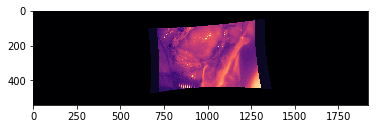

In [42]:
# Load and display sample images

left_image_path = '/Users/lalithnag/00-code/voxelmorph/sample_rect_frames/leftrect19.bmp'
assert os.path.exists(left_image_path)==True, "Path does not exist"
left_image = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
#cv2.imshow('leftimage', left_image)
#cv2.waitKey(0)

plt.imshow(left_image.astype('uint8'), cmap='magma')

(192, 224)


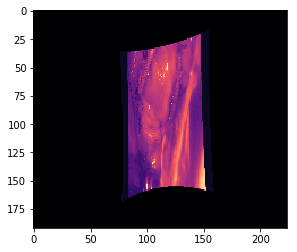

In [43]:
resized_image = cv2.resize(left_image, (224, 192))
plt.imshow(resized_image.astype('uint8'), cmap='magma')
print(resized_image.shape)

In [77]:
def centerCrop(x, crop_h, crop_w=None, pos=2.):
    
    """
    Crops the image to the size given by the user, based on 
    the position parameter

    Inputs:
    -x: Image to be cropped
    -crop_h: Height to be cropped
    -crop_y: Width to be cropped
    -pos: Speficies how to crop the image
     If pos = 'left', then the image is cropped to the left third
     If pos = 'right' then the image is cropped to the right third
     If pos = 'center' then the image is cropped in the center

    Returns:
    -cropped_img = Cropped Image
    
    """
    h, w = x.shape[:2] # True dims of image
    
    #print('true dims', h,w)
    
    #print('crop dims', crop_h, crop_w)
    
    j = int(round((h - crop_h) / pos))
    i = int(round((w - crop_w) / pos))
    
    #print(i,j)

    cropped_img = x[j:j + crop_h, i:i + crop_w]
    return cropped_img

(540, 1920)
true dims 540 1920
crop dims 440 540
690 50
(192, 224)


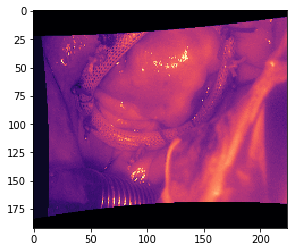

In [66]:
print(left_image.shape)
cropped_image = centerCrop(left_image, 440, 540)
resized_image = cv2.resize(cropped_image, (224, 192))
plt.imshow(resized_image.astype('uint8'), cmap='magma')
print(resized_image.shape)

In [84]:
def concat(path, which, start, end):
    
    concat = np.zeros((160, 192, 224))
    
    ctr = start
    
    for i in range(end-start):
        
        image_path = os.path.join(path, which + 'rect' + str(ctr) + '.bmp')
                             
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        cropped_image = centerCrop(image, 440, 540)
        resized_image = cv2.resize(cropped_image, (224, 192))
        concat[i,:,:] = resized_image
        
        ctr += 1
    
    return concat

In [79]:
for i in range(1,4):
    print(i)

1
2
3


In [85]:
path = '/Users/lalithnag/00-code/voxelmorph/sample_rect_frames'
which = 'left'
start = 23
end = 183

concat_left = concat(path, which, start, end)
print(concat_left.shape)

(160, 192, 224)


In [29]:
concat = np.zeros((160, resized_image.shape[0], resized_image.shape[1]))
print(concat.shape)
print(resized_image.shape)

for i in range(160):
    concat[i,:,:] = resized_image

print(concat.shape)

(160, 192, 224)
(192, 224)
(160, 192, 224)


In [39]:
sitk_img = sitk.GetImageFromArray(concat, isVector=False)
sitk.WriteImage(sitk_img, '/Users/lalithnag/Desktop/00-code/voxelmorph/concat.nrrd')

RuntimeError: Exception thrown in SimpleITK WriteImage: /scratch/dashboard/SimpleITK-OSX10.6-x86_64-pkg/SimpleITK-build/ITK/Modules/IO/NRRD/src/itkNrrdImageIO.cxx:1123:
itk::ERROR: NrrdImageIO(0x128825510): Write: Error writing /Users/lalithnag/Desktop/00-code/voxelmorph/concat.nrrd:
[nrrd] nrrdSave: couldn't fopen("/Users/lalithnag/Desktop/00-code/voxelmorph/concat.nrrd","wb"): No such file or directory


In [ ]:
left_image_path = '/Users/lalithnag/00-code/voxelmorph/sample_rect_frames/leftrect19.bmp'
assert os.path.exists(left_image_path)==True, "Path does not exist"
left_image = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(left_image, (224, 192))
concat = np.zeros((160, resized_image.shape[0], resized_image.shape[1]))
for i in range(160):
    concat[i,:,:] = resized_image